In [69]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [6]:
df_exl = pd.read_excel("Breast Cancer.xlsx")

In [15]:
df_csv = df_exl.to_csv('Breast_Cancer.csv', index=None)

In [16]:
df = pd.read_csv('Breast_Cancer.csv')

In [18]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    float64
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
x = df.drop('diagnosis', axis=1)

In [24]:
y = df[['diagnosis']]

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [34]:
# Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [36]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = dt.predict(x_test)

# COnfusion_Matrix

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, plot_roc_curve

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [44]:
accuracy_score(y_test, y_pred)

0.9415204678362573

In [48]:
dt.score(x_test, y_test)

0.9415204678362573

In [49]:
confusion_matrix(y_test, y_pred)

array([[101,   7],
       [  3,  60]], dtype=int64)

In [52]:
confusion_matrix(y_test, y_pred).reshape(-1)

array([101,   7,   3,  60], dtype=int64)

In [58]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)

In [59]:
tp

101

In [63]:
fn

7

In [64]:
fp

3

In [65]:
tn

60

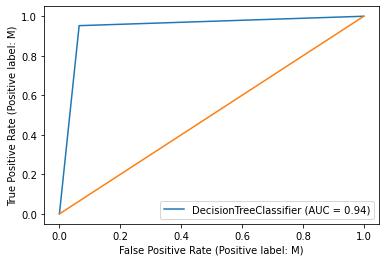

In [74]:
plot_roc_curve(dt, x_test, y_test);
plt.plot([0,1], [0,1]);

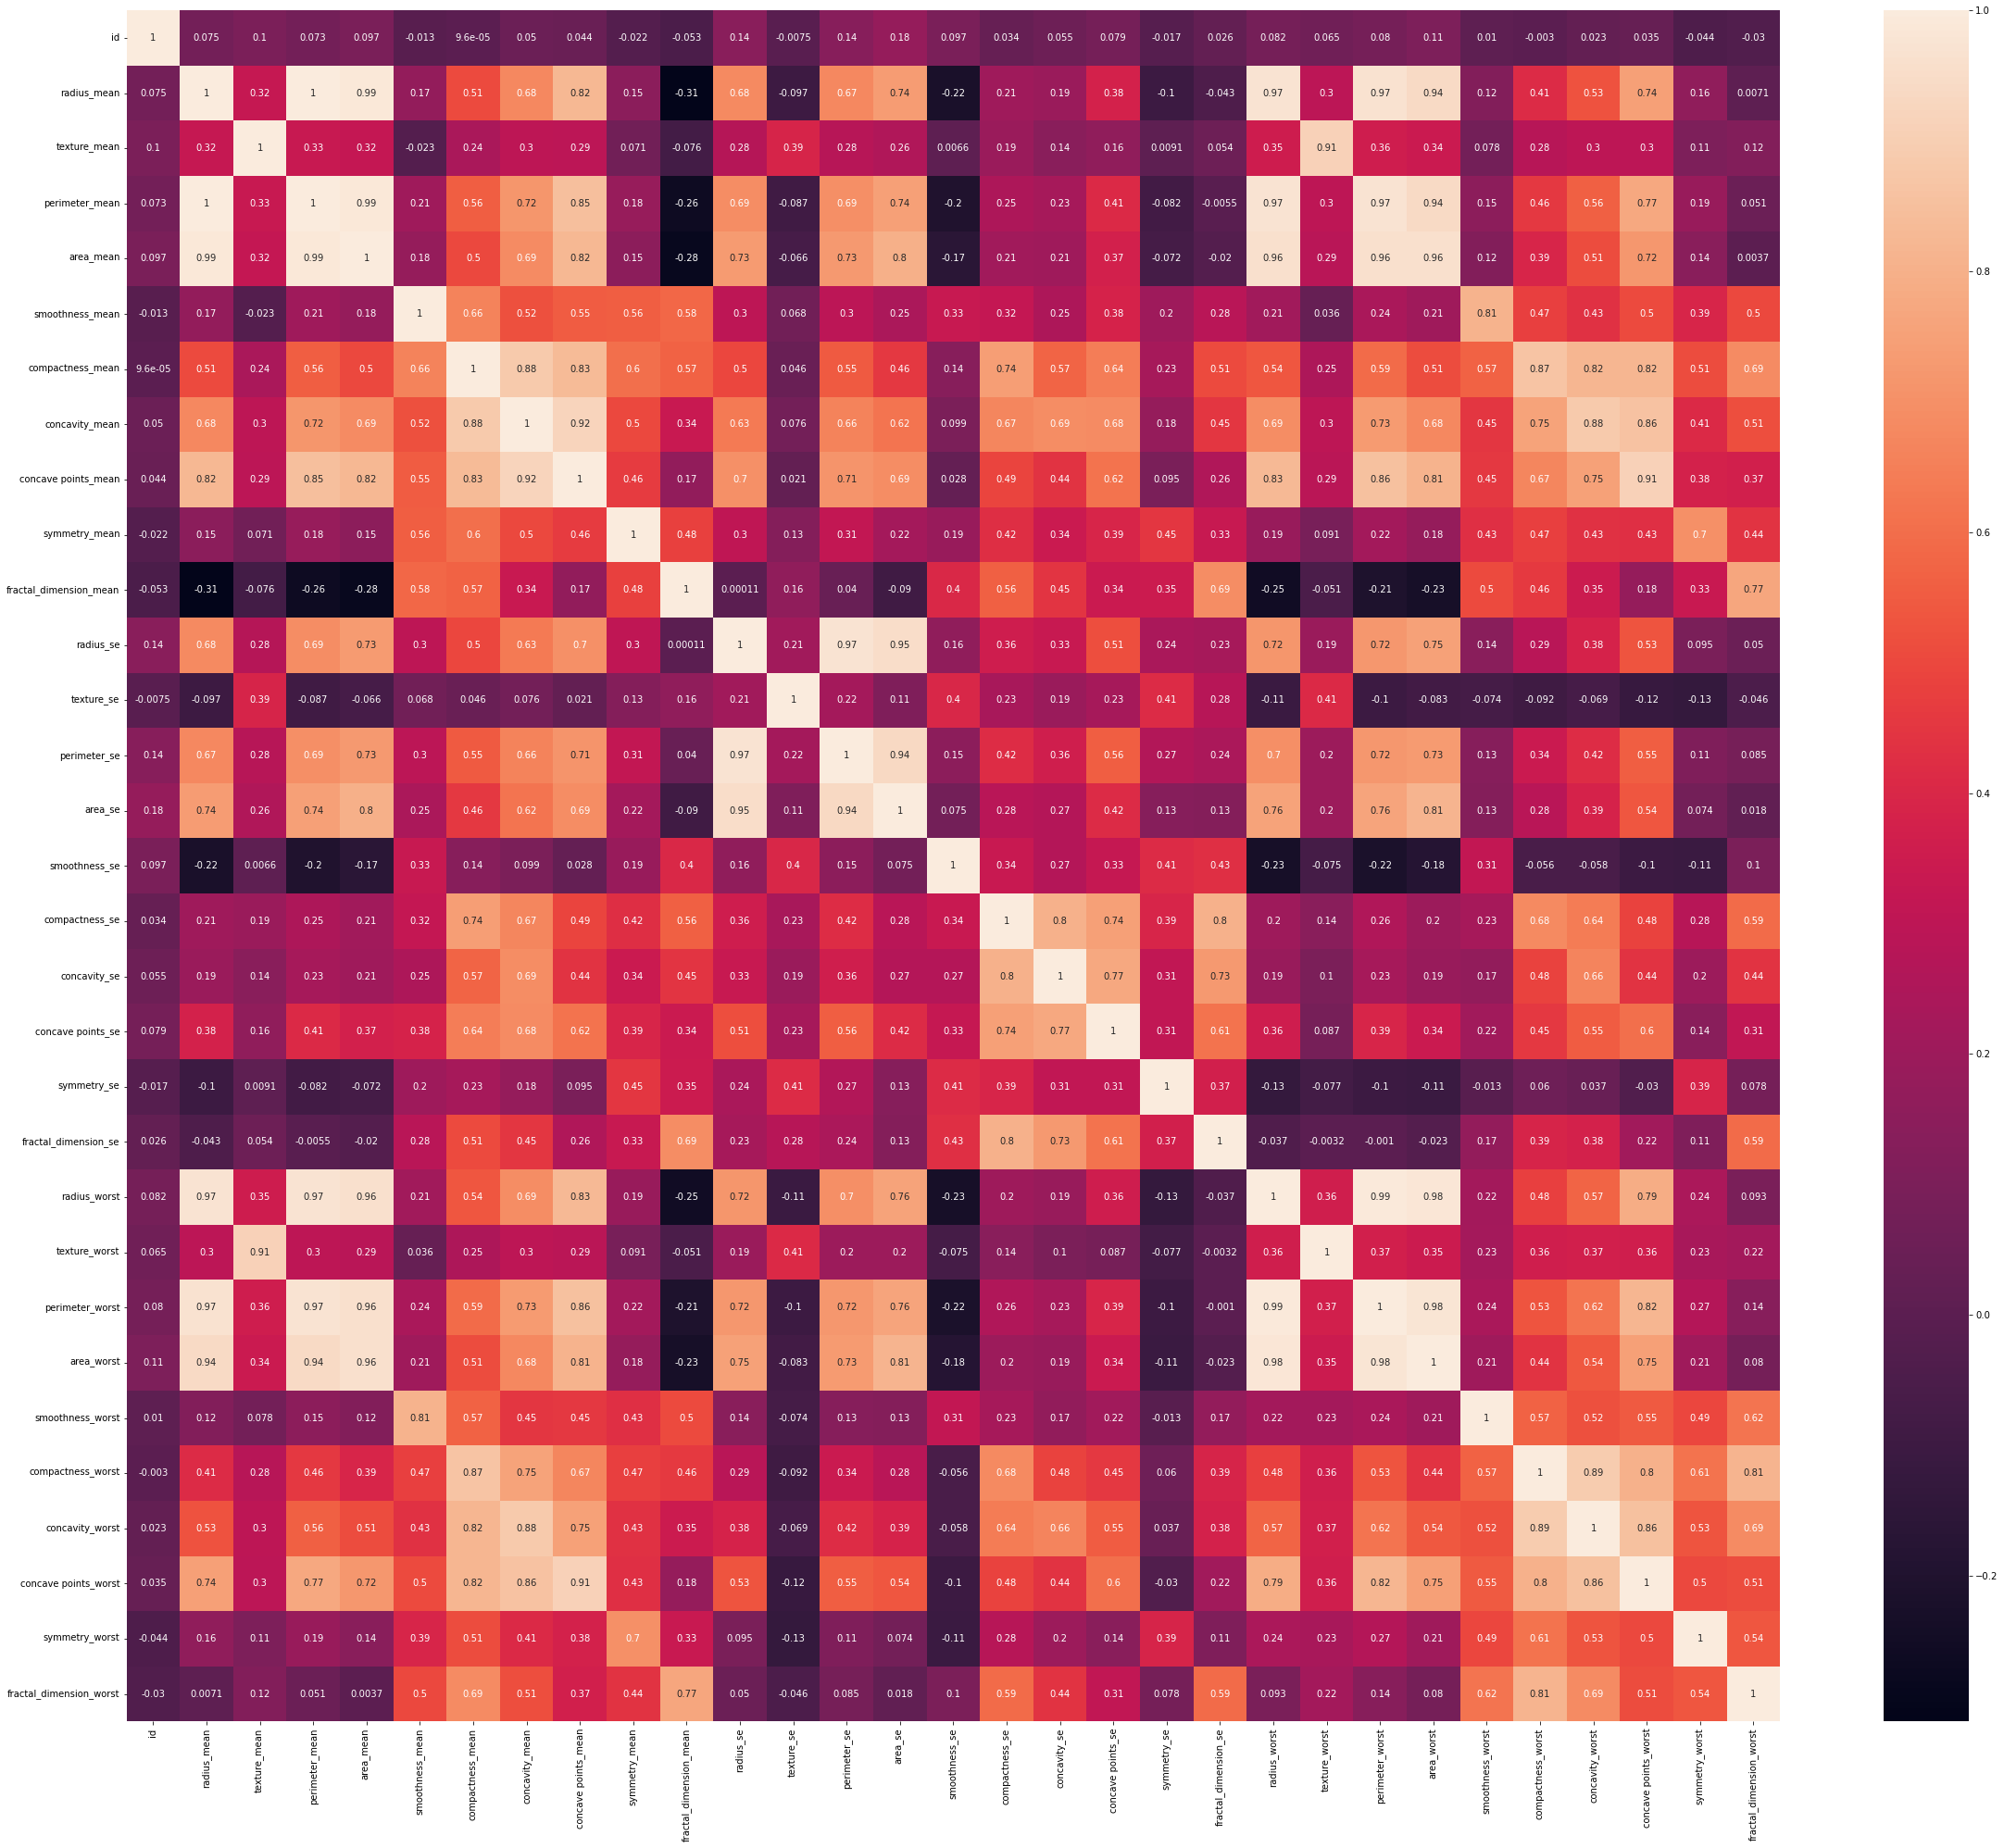

In [78]:
plt.figure(figsize=(40,34));
sns.heatmap(df.corr(), annot=True);